# Analisis exploratorio de datos (EDA)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from pandas.io.parsers.readers import read_csv
df_games = read_csv('games.csv')
df_items = read_csv('items.csv')
df_reviews = read_csv('reviews.csv')
df_generos = read_csv('generos.csv')

Mirar cual es el tipo de dato de cada una de las columnas de los datasets

In [4]:
df_games.dtypes

publisher        object
app_name         object
title            object
release_date     object
tags             object
specs            object
price           float64
early_access    float64
id                int64
developer        object
dtype: object

In [5]:
df_generos.dtypes

id         int64
genres    object
dtype: object

In [6]:
df_items.dtypes

user_id             object
items_count          int64
user_url            object
item_id              int64
item_name           object
playtime_forever     int64
playtime_2weeks      int64
dtype: object

In [7]:
df_reviews.dtypes

user_id               object
user_url              object
posted                object
last_edited           object
item_id                int64
helpful               object
recommend               bool
review                object
reviews_translated    object
sentiment_score       object
sentiment              int64
dtype: object

Se hace join con los datasets df_games, df_reviews y df_generos, se seleccionan las variables que considero importantes para analizar y las guardo en un nueco dataframe

In [8]:
archivo = pd.merge(df_games, df_reviews, left_on= 'id', right_on= 'item_id')

In [9]:
# Se filtra el nuevo dataframe por las columnas que se van a analizar
archivo = archivo[['id', 'title', 'developer', 'price', 'release_date', 'sentiment']]

Se decide extraer el año de release date para el analisis por lo que solo se usaran los registros que no tengan datos nulos en release_date

In [10]:
archivo = archivo[archivo['release_date'].notna()]
archivo['year'] = archivo['release_date'].str.split('-').str[0].astype(int)

In [11]:
#archivo = pd.merge(archivo, df_generos, on= 'id')

In [12]:
archivo.head(5)

,id,title,developer,price,release_date,sentiment,year
0,70,Half-Life,Valve,9.99,1998-11-08,2,1998
1,70,Half-Life,Valve,9.99,1998-11-08,0,1998
2,70,Half-Life,Valve,9.99,1998-11-08,0,1998
3,70,Half-Life,Valve,9.99,1998-11-08,2,1998
4,70,Half-Life,Valve,9.99,1998-11-08,0,1998


Se sabe que hay datos duplicados mas sin embargo dado que cada uno de estos registros pertenecen a usuarios diferentes, se decide mantener el dataframe archivo como se encuentra

La columna id y la columna sentiment es de tipo numerico por lo que se decide cambiarla a tipo string

In [13]:
archivo['sentiment'] = archivo['sentiment'].astype(str)
archivo['id'] = archivo['id'].astype(str)

Miramos un describe de las variables numericas, y las visualizamos en un histograma y boxplot

In [14]:
archivo.describe()

,price,year
count,41222.000000,41222.000000
mean,13.249661,2011.690238
std,14.371771,3.286597
min,0.000000,1989.000000
25%,0.000000,2010.000000
50%,9.990000,2012.000000
75%,19.990000,2014.000000
max,771.710000,2017.000000


<Axes: xlabel='price', ylabel='Count'>

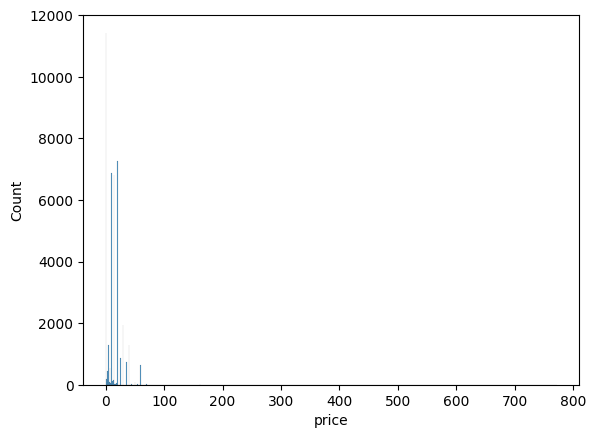

In [15]:
sns.histplot(data=archivo, x='price')

<Axes: xlabel='price'>

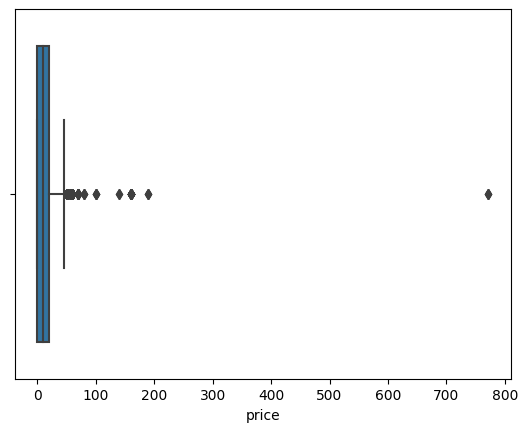

In [16]:
sns.boxplot(data=archivo, x='price')

tanto en el histograma como en el boxplot nos podemos dar cuenta que hay valores atipicos en el precio

In [17]:
atipicos_price = archivo[archivo['price'] > 250]
atipicos_price

,id,title,developer,price,release_date,sentiment,year
13804,292180,X-Plane 10 Global - 64 Bit,Laminar Research,771.71,2014-07-14,2,2014
13805,292180,X-Plane 10 Global - 64 Bit,Laminar Research,771.71,2014-07-14,2,2014
13806,292180,X-Plane 10 Global - 64 Bit,Laminar Research,771.71,2014-07-14,2,2014


<Axes: xlabel='year', ylabel='Count'>

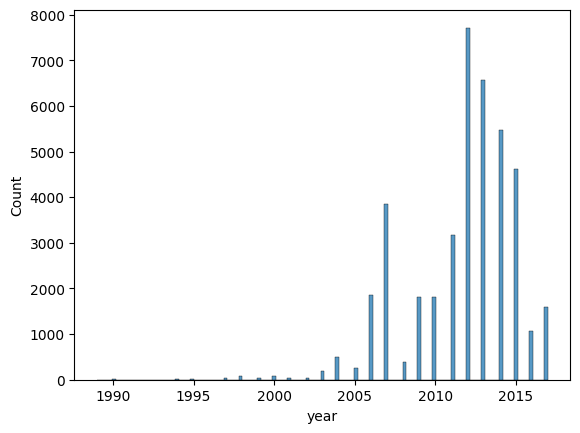

In [18]:
sns.histplot(data=archivo, x='year')

<Axes: xlabel='year'>

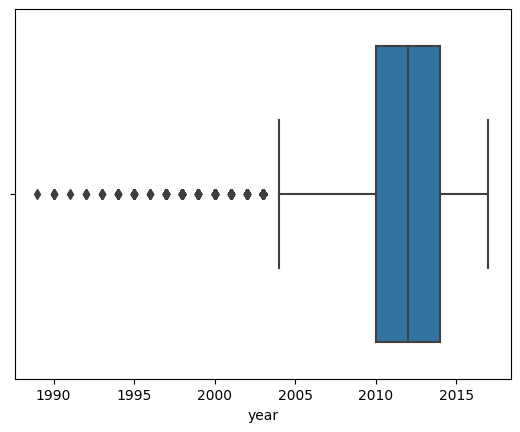

In [19]:
sns.boxplot(data=archivo, x='year')

se puede ver que tambien existen datos atipicos en los años

Se dejaran los registros con datos atipicos para no excluir ningun juego

Ahora se relacionaral las variables price y year

In [20]:
df_cuantitativas = archivo[['price', 'year']]
matriz_correlacion = df_cuantitativas.corr()
matriz_correlacion

,price,year
price,1.000000,0.161886
year,0.161886,1.000000


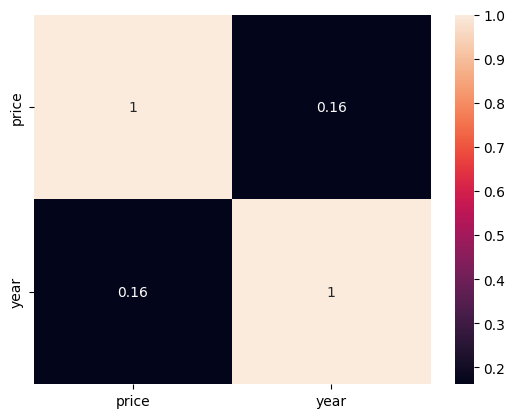

In [21]:
sns.heatmap(matriz_correlacion, annot=True)
plt.show()

Se puede decir que estas dos tienen una baja correlacion

Ahora hacemos un describe de las variables categoricas para ello cambiamos el tipo de dato a category

In [22]:
archivo['developer'] = archivo['developer'].astype('category')
archivo['title'] = archivo['title'].astype('category')
archivo['sentiment'] = archivo['sentiment'].astype('category')

In [23]:
archivo.describe(include='category')

,title,developer,sentiment
count,41222,40995,41222
unique,2394,1645,3
top,Team Fortress 2,Valve,2
freq,3436,8371,23197


<Axes: xlabel='sentiment', ylabel='price'>

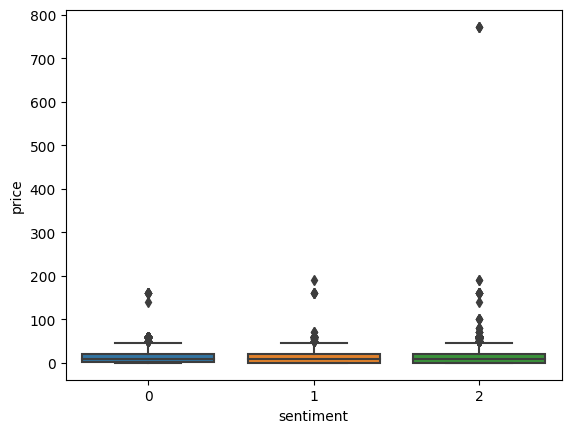

In [26]:
sns.boxplot(data=archivo, x='sentiment', y='price')

<Axes: xlabel='sentiment', ylabel='year'>

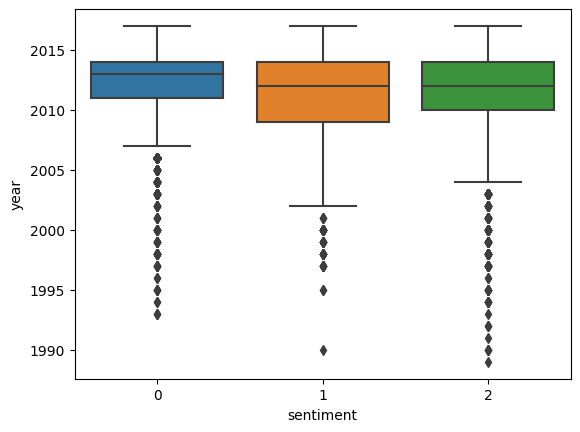

In [27]:
sns.boxplot(data=archivo, x='sentiment', y='year')